# Домашнее задание №4

Задание выполнил(а): `Соломенцев Александр`

### Общая информация

__Дата выдачи:__ 21.01.2022

__Дедлайн:__ 13.02.2022 23:59

### О задании

Часть 1 содержит теоретические задачи на решающие деревья.

Часть 2 содержит практическое задание на реализацию разбиения вершины в решающем дереве.

Часть 3 содержит практическое задание на применение ансамблей в машинном обучении.

Обратите внимание, что вам не только нужно написать код, но и в некоторых местах ответить на вопросы.



### Оценивание и штрафы


#### Theory  [4 балла]
* [Задание 1](#task1) [1 балл]
* [Задание 2](#task2) [1 балл]
* [Задание 3](#task3) [1 балл]
* [Задание 4](#task4) [1 балл]

#### Решающие деревья [7 баллов]
* [Задание 1](#task2_1) [1 балл]
* [Задание 2](#task2_2) [1 балл]
* [Задание 3](#task2_3) [1 балл]
* [Задание 4](#task2_4) [2 балла]
* [Задание 5](#task2_5) [1 балл]
* [Задание 6](#task2_6) [1 балл]

#### Ансамбли  [7 баллов]
* [Задание 1](#task3_1) [1 балл]
* [Задание 2](#task3_2) [1 балл]
* [Задание 3](#task3_3) [1 балл]
* [Задание 4](#task3_4) [2 балла]
* [Задание 5](#task3_5) [1 балл]
* [Задание 6](#task3_6) [1 балл]


Итоговая оценка за домашнюю работу вычисляется по формуле: $$s \cdot \frac{10}{18},$$ где $s$ - сумма набранных балов. 

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 0.25 балла в день (от оценки в 10 бальной шкале), но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/course/890). 

# Часть 1. Теоритическая

### Задание 1 [1 балл] <a id="task1"></a>

В листе дерева оказываются 10 объектов, 8 из которых из одного класса, а 2 - из второго. Посчитайте (двоичную - с логарифмом по основанию 2) энтропию получившейся выборки в листе. Ответ округлите до двух знаков после запятой.

**Ответ:** 

$H(p_1, p_2) = - \sum_{i=1}^2 {p_i \log_2 p_i} = H(0.8,0.2) = - 0.8 \cdot \log_2 {0.8} -  0.2 \cdot \log_2 {0.2} = 0.72$ 

In [1]:
from math import log

print(f'H(0.8,0.2) = {round(- ( 0.8 * log(0.8, 2) + 0.2 * log(0.2, 2) ),2)}')

H(0.8,0.2) = 0.72


### Задание 2 [1 балл] <a id="task2"></a>

Для приведенной ниже таблицы посчитайте, сколько нужно перебрать предикатов вида $[x_j = a]$ ([признак = какое-то значение]), чтобы построить первый узел решающего дерева.

| $x_1$ | $x_2$ | $x_3$ | $y$ |
|------|------|------|------|
| A1 | A2 | A3 | A|
| B1 | A2 | A3 | A|
| C1 | B2 | A3 | B|
| A1 | C2 | B3 | A|
| B1 | D2 | A3 | B|
| B1 | C2 | B3 | B|
| C1 | D2 | B3 | A|

**Ответ:** всего необходимо перебрать `9` предикатов вида $[x_j = a]$, так как $x_{i,1} \in (A_1, B_1, C_1)$, следовательно, необходимо перебрать 3 предиката вида $[x_j = a]$ для  $x_j = x_1$, $x_{i,2} \in (A_2, B_2, C_2, D_2)$ – 4 предиката, $x_{i,3} \in (A_3, B_3)$ – 2 предиката.

### Задание 3 [1 балл] <a id="task3"></a>

Используя приведенную таблицу, по какому признаку следует формировать первый узел решающего дерева, если мы хотим предсказать $y$? В качестве критерия информативности использовать энтропию, в качестве критериев разделения - индикаторы $[x_j = a]$.

| $x_1$ | $x_2$ | $x_3$ | $x_4$ | $y$ |
|------|------|------|------|------|
| A1 | A2 | A3 | A4 | A |
| B1 | A2 | B3 | A4 | A |
| C1 | C2 | A3 | A4 | A |
| A1 | A2 | D3 | B4 | A |
| C1 | B2 | C3 | A4 | B |
| B1 | C2 | D3 | B4 | A |
| A1 | B2 | B3 | A4 | A |
| C1 | C2 | C3 | B4 | B |
| B1 | B2 | C3 | B4 | B |
| A1 | C2 | C3 | A4 | B |

__Подсказка.__ *Внимательно посмотрите на данные.*

**Ответ:** следует формировать первый узел по критерию $x_j = x_3$ (например, $[x_3 = С_3]$), тогда значение энтропии для такого разделения будет равно $0$, так как разделение по предикату $[x_3 = С_3]$ точно определяет класс переменной $y$ (класс $A$ или $B$).

### Задание 4 [1 балл] <a id="task4"></a>

Из перечисленных наборов объектов разных классов выберите набор с **наименьшей** энтропией.

    1) 30 объектов класса 0, 10 объектов класса 1
    2) 20 объектов класса 0, 10 объектов класса 1, 10 объектов класса 2
    3) 35 объектов класса 0, 5 объектов класса 1, 5 объектов класса 2
    4) 20 объектов класса 0, 20 объектов класса 1

**Ответ:** набор 1 обладает наименьшей энтропией.

In [2]:
import numpy as np

entropy_1 = - ( 30/40 * log(30/40, 2) + 10/40 * log(10/40, 2) )
entropy_2 = - ( 20/40 * log(20/40, 2) + 10/40 * log(10/40, 2) + 10/40 * log(10/40, 2) )
entropy_3 = - ( 35/45 * log(35/45, 2) + 5/45 * log(5/45, 2) + 5/45 * log(5/45, 2) )
entropy_4 = - ( 20/40 * log(20/40, 2) + 20/40 * log(20/40, 2) )

res = [entropy_1, entropy_2, entropy_3, entropy_4]

print(f'Наименошее значение энтропии {np.min(res)} у набора данных {np.argmin(res) + 1}.' )

Наименошее значение энтропии 0.8112781244591328 у набора данных 1.


# Часть 2. Практика - решающие деревья.

В этой части вам предстоит реализовать первое разбиение в решающем дереве своими руками.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston

%matplotlib inline

In [4]:
plt.rcParams['figure.figsize'] = (11, 6.5)

Импортируем данные.

In [5]:
boston = load_boston()

/Users/alexandersolomentsev/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the C

Описание данных:

In [6]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Данные представлены в виде словаря, у которого есть следующие ключи:

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Представим данные в виде `pandas.DataFrame`, также добавим в них целевую переменную.

In [8]:
X = pd.DataFrame(data=boston['data'], columns=boston['feature_names'])
X['target'] = boston['target']
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Распределение целевой переменной:

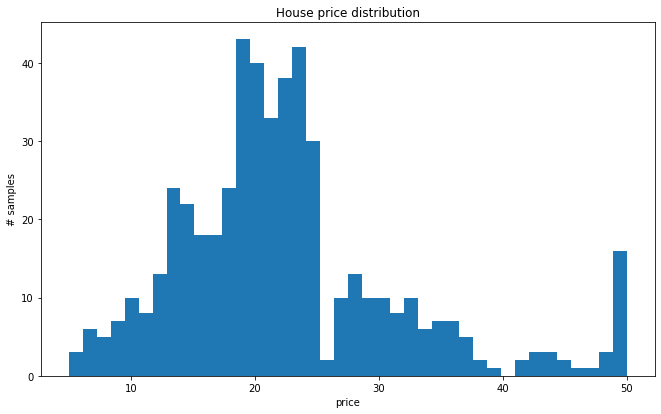

In [9]:
plt.title('House price distribution')
plt.xlabel('price')
plt.ylabel('# samples')
plt.hist(X['target'], bins=40)
plt.show()

Напомним, как ищется разбиение в конкретной вершине. Пусть мы выбрали какой-то признак и порог. Обозначим $R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки выглядит следующим образом:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t},
$$

где $R_\ell$ - множество объектов в левой вершине (поддереве), $R_r$ - множество объектов в правой вершине (поддереве), $|R|$ - число объектов в множестве $R$, а $H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$. Например, в случае классификации $H(R)$ может быть выражено энтропией, а в случае регрессии - дисперсией.

Мы хотим минимизировать $Q(R_m, j, t)$ по $j$ и $t$ - то есть подобрать такие $j$ и $t$, что для них значение $Q(R_m, j, t)$ будет минимальным.

### Задание 1 [1 балл] <a id="task2_1"></a>

Реализуйте функцию подсчета критерия информативности. В данном случае мы решаем задачу регрессии, так что используйте дисперсию значений целевой переменной (колонка 'target').

Сделайте так, чтобы даже для пустой таблицы (в которой нет ни одного объекта) выдавался численный ответ - 0, а не NaN. Возможно, в этом вам поможет функция `np.nan_to_num`.

In [10]:
def H(R):
    """
    INPUT
    R - pd.DataFrame - характеризует собой набор объектов в вершине. В нашем случае R - это будет подмножество объектов из
    изначальной таблицы X
    
    OUTPUT
    H(R) - значение критерия информативности (дисперсия значений целевой переменной объектов в вершине)
    """
    H = np.nan_to_num( R.target.var() )
    return H

In [11]:
# Test the function
assert np.allclose(H(X), 84.5867235940986)
assert np.allclose(H(pd.DataFrame(columns=X.columns)), 0.0)

### Задание 2 [1 балл]<a id="task2_2"></a>

Реализуйте функцию, которая разобьет объекты в данной вершине на две группы по заданному признаку `feature` и порогу `t`. Пусть в левую вершину попадут объекты, у которых значение `feature <= t`, а в правую - у которых значение `feature > t`.

In [12]:
def split_node(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    R_l - pd.DataFrame - объекты, которые попали в левую вершину
    R_r - pd.DataFrame - объекты, которые попали в правую вершину
    """
    R_l = R_m[R_m[feature] <= t]
    R_r = R_m[R_m[feature] > t]
    return R_l, R_r

In [13]:
# Test the function
R_l, R_r = split_node(X, 'ZN', 6.0)
assert np.allclose(H(R_l), 73.7555971219894)
assert np.allclose(H(R_r), 70.64116541353386)
assert R_l['ZN'].max() <= 6.0
assert R_r['ZN'].min() > 6.0

### Задание 3 [1 балл]<a id="task2_3"></a>

Реализуйте функцию, подсчитывающую значение критерия ошибки. Разделите данные по заданным признаку и порогу, посчитайте значения критериев информативности в полученных вершинах и получите результат по формуле в начале задания.

In [14]:
def q_error(R_m, feature, t):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    t - float - порог признака feature, по которому разбиваем данные
    
    OUTPUT
    Q - float - значение критерия ошибки
    """
    R_l, R_r = split_node(R_m, feature, t)
    Q = H(R_l) * R_l.shape[0] / R_m.shape[0] + H(R_r) * R_r.shape[0] / R_m.shape[0]
    return Q

In [15]:
assert np.allclose(q_error(X, 'ZN', 6.0), 72.93082666955256)

### Задание 4 [2 балла]<a id="task2_4"></a>

Теперь, когда основные функции реализованы, можно перейти к непосредственному поиску оптимальных признака и порога. Для начала реализуйте функцию, с помощью которой можно найти оптимальный порог для разбиения вершины с помощью заданного признака. В качестве пороговых значений можно перебрать все уникальные значения признака, посчитать для каждого значение критерия ошибки, а затем выбрать пороговое значение, соответствующее наименьшему значению критерия ошибки.

In [16]:
def get_optimal_t(R_m, feature):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    feature - string - название столбца (признака)
    
    OUTPUT
    t_opt - float - оптимальное значение порога (для которого значение критерия ошибки минимально)
    t_array - list - список перебираемых пороговых значений
    Q_array - list - список значений критерия ошибки, соответствующих перебранным пороговым значениям (для построения графика)
    """
    Q_array = np.array([q_error(R_m, feature, t) for t in X[feature].unique()])
    t_array = X[feature].unique()
    t_opt = t_array[Q_array.argmin()]
    return t_opt, t_array, Q_array

In [17]:
# Test function
t_opt, t_array, Q_array = get_optimal_t(X, 'CRIM')
assert np.allclose(t_opt, 6.65492)

Выведите график зависимости значения критерия ошибки (`Q`) от порогового значения (`t`) при разбиении вершины по признаку `CRIM`.

Text(0, 0.5, 'Значение критерия ошибки (Q)')

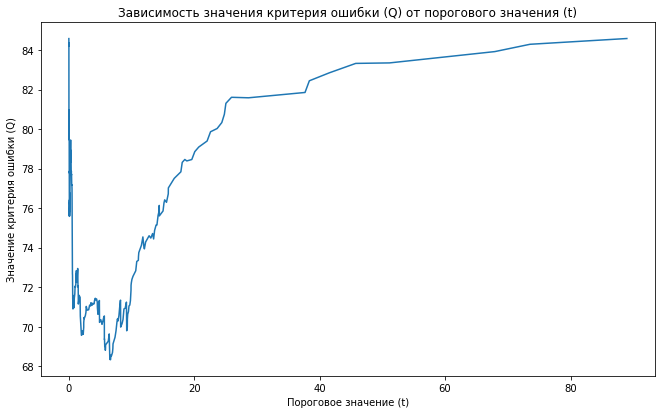

In [18]:
# your code here
plot_data = np.array(sorted(list(zip(t_array, Q_array)), key=lambda x: x[0]))
plt.plot(plot_data[:,0], plot_data[:,1])
plt.title("Зависимость значения критерия ошибки (Q) от порогового значения (t)")
plt.xlabel('Пороговое значение (t)')
plt.ylabel('Значение критерия ошибки (Q)')

### Задание 5 [1 балл]<a id="task2_5"></a>

Теперь реализуйте функцию, с помощью которой можно определить также оптимальный признак. Внутри функции пройдитесь циклом по всем признакам, для каждого вызовите `get_optimal_t`, найдите оптимальный порог и минимальное значение критерия ошибки. Сравните полученные результаты (признаки, пороги и значения критерия ошибки для них) и выберите признак с порогом, соответствующие наименьшему значению критерия ошибки.

**ИСКЛЮЧИТЕ ИЗ РАССМОТРЕНИЯ КОЛОНКУ 'target', ЭТО НЕ ПРИЗНАК!**

In [19]:
def get_optimal_split(R_m):
    """
    INPUT
    R_m - pd.DataFrame - объекты в исходной вершине
    
    OUTPUT
    feature_opt - оптимальное значение признака для разбиения вершины
    t_opt - оптимальное значение порога для разбиения вершины
    """
    data = []
    
    for feature in R_m.columns[:-1]:
        t_opt_f, t_array_f, Q_array_f = get_optimal_t(R_m, feature)
        Q_opt_f = q_error(X, feature, t_opt_f)
        data.append(tuple([feature, t_opt_f, Q_opt_f]))
    
    data = np.array(data, 
                    dtype=[('feature', 'U10'), ('t', np.float32), ('Q', np.float32)])
    
    feature_opt = data[data['Q'].argmin()]['feature']
    t_opt = data[data['Q'].argmin()]['t']
    return feature_opt, t_opt

In [20]:
# Test the function
feature_opt, t_opt = get_optimal_split(X)
print('Optimal feature:', feature_opt)
print('Optimal t:', t_opt)
assert feature_opt == 'RM'
assert np.allclose(t_opt, 6.939)

Optimal feature: RM
Optimal t: 6.939


### Задание 6 [1 балл]<a id="task2_6"></a>

Изобразите на графике диаграмму рассеяния для объектов выборки со значением оптимального признака на одной оси и целевой переменной на другой. Нарисуйте линию, показывающую оптимальное разбиение по порогу (функция `plt.axvline`).

Как вы можете интерпретировать то, что полученное разбиение - лучшее?

Text(0, 0.5, 'Значение критерия целевой переменной (target)')

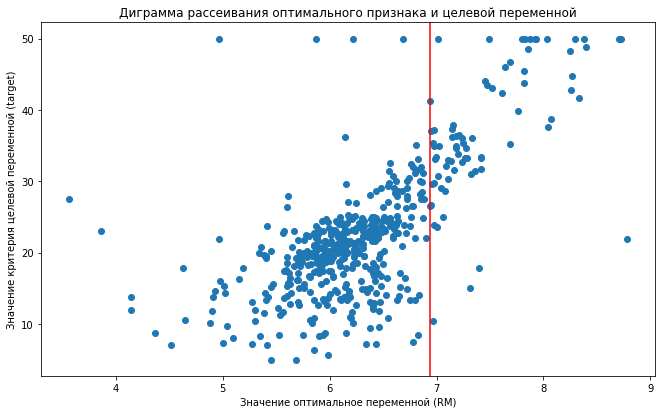

In [21]:
# your code here
plt.scatter(X.RM, X.target)
plt.axvline(x=t_opt, c='red')
plt.title("Диграмма рассеивания оптимального признака и целевой переменной")
plt.xlabel(f'Значение оптимальное переменной ({feature_opt})')
plt.ylabel('Значение критерия целевой переменной (target)')

# Часть 3. Практика - ансамбли

В данной части будем работать [с задачей предсказания диабета у пациента](https://www.kaggle.com/uciml/pima-indians-diabetes-database/data).

In [22]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [23]:
data = pd.read_csv('diabetes.csv')

In [24]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [25]:
data.shape

(768, 9)

Распределение целевой переменной:

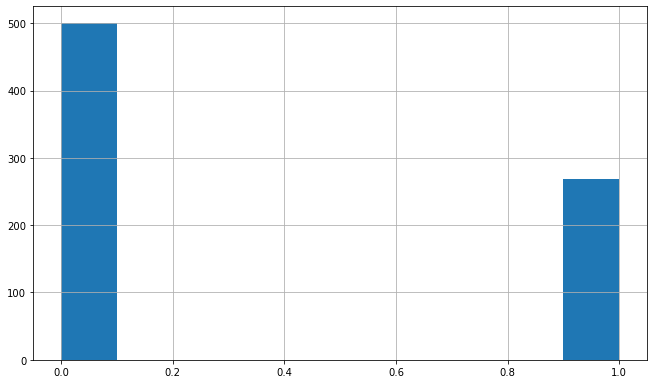

In [26]:
data['Outcome'].hist()
plt.show()

### Задание 1 [1 балл]<a id="task3_1"></a>

Разбейте выборку на обучающую и тестовую части в отношении 70:30. Не забудьте отделить целевую переменную от признаков (чтобы случайно не включить ее в обучение как признак).

In [27]:
# your code here
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]], 
                                                    data.Outcome, 
                                                    test_size=0.3,
                                                    random_state=212)

### Задание 2 [1 балл]<a id="task3_2"></a>

Обучите [`BaggingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) на деревьях (параметр `base_estimator=DecisionTreeClassifier()`). Оцените качество классификации на тестовой выборке по метрикам accuracy, precision и recall.

In [28]:
# your code here
dt_clf = BaggingClassifier(base_estimator= DecisionTreeClassifier(random_state=212), 
                           n_estimators= 50,
                           n_jobs= -1,
                           bootstrap= True,
                           oob_score= True,
                           random_state= 212)

dt_clf.fit(X=X_train, y=y_train)

y_pred = dt_clf.predict(X_test)

dt_clf_acc = accuracy_score(y_true= y_test, y_pred= y_pred)
dt_clf_precision = precision_score(y_true= y_test, y_pred= y_pred)
dt_clf_recall = recall_score(y_true= y_test, y_pred= y_pred)

print(f""" 
Качество классификации на тестовой выборке для модели Decision Tree Classifier по следующим метрикам составляет:
 * accuracy – {dt_clf_acc},
 * precision – {dt_clf_precision},
 * recall – {dt_clf_recall}.
""")

 
Качество классификации на тестовой выборке для модели Decision Tree Classifier по следующим метрикам составляет:
 * accuracy – 0.6883116883116883,
 * precision – 0.65625,
 * recall – 0.45652173913043476.



### Задание 3 [1 балл]<a id="task3_3"></a>

Теперь обучите Random Forest с числом деревьев, равным 50. Оцените качество классификации по тем же метрикам. Какая из двух построенных моделей показала себя лучше?

In [29]:
# your code here
rf_clf = RandomForestClassifier(n_estimators=50,
                                n_jobs=-1,
                                bootstrap=True,
                                oob_score=True,
                                random_state=212)

rf_clf.fit(X=X_train.values, y=y_train)

y_pred = rf_clf.predict(X_test.values)

rf_clf_acc = accuracy_score(y_true= y_test, y_pred= y_pred)
rf_clf_precision = precision_score(y_true= y_test, y_pred= y_pred)
rf_clf_recall = recall_score(y_true= y_test, y_pred= y_pred)

print(f""" 
Качество классификации на тестовой выборке для модели Random Forest Classifier по следующим метрикам составляет:
 * accuracy – {rf_clf_acc},
 * precision – {rf_clf_precision},
 * recall – {rf_clf_recall}.
""")

 
Качество классификации на тестовой выборке для модели Random Forest Classifier по следующим метрикам составляет:
 * accuracy – 0.7229437229437229,
 * precision – 0.6842105263157895,
 * recall – 0.5652173913043478.



**Ответ:** модель Random Forest Classifier показало лучшее качество по сравнению с моделью Decision Tree Classifier по всем трем исследуемым метрикам: accuracy, precision и recall. Такие результаты могут свидетельствовать о том, что модель Random Forest Classifier в данном случае оказалась лучше.

### Задание 4 [2 балл]<a id="task3_4"></a>

Для случайного леса проанализируйте значение AUC-ROC на этих же данных в зависимости от изменения параметров (можете сделать обычный перебор с обучением/тестированием в цикле):
* `'n_estimators'` (можно перебрать около 10 значений из отрезка от 10 до 1500)
* `'min_samples_leaf'` (сетку значений можете выбрать на ваше усмотрение)

Постройте соответствующие графики зависимости AUC-ROC от этих параметров. Какие выводы вы можете сделать?

In [30]:
# your code here
n_estimators = [10, 50, 100, 250, 350, 500, 750, 1000, 1250, 1500]
min_samples_leaf = [5, 6, 7, 8, 9, 10, 15, 20]

roc_auc_array = np.zeros((len(n_estimators), len(min_samples_leaf)))

for i, est in enumerate(n_estimators):
    for j, leafs in enumerate(min_samples_leaf):
        rnd_clf = RandomForestClassifier(n_estimators=est, min_samples_leaf= leafs, random_state=212)
        rnd_clf.fit(X_train.values, y_train)
        y_hat = rnd_clf.predict(X_test.values)
        rnd_clf_roc_auc = roc_auc_score(y_true= y_test, y_score= y_hat)
        
        roc_auc_array[i,j] = rnd_clf_roc_auc
        
roc_auc_array

array([[0.69987488, 0.68357053, 0.70347201, 0.71793869, 0.69803722,
        0.71602283, 0.67086331, 0.6852518 ],
       [0.70714733, 0.70530967, 0.70890679, 0.69268064, 0.68724586,
        0.71250391, 0.70339381, 0.6943619 ],
       [0.69627776, 0.6944401 , 0.70530967, 0.68364873, 0.68724586,
        0.70706913, 0.6943619 , 0.70339381],
       [0.6944401 , 0.69627776, 0.69987488, 0.70347201, 0.69803722,
        0.70706913, 0.70523147, 0.70699093],
       [0.69987488, 0.69627776, 0.69987488, 0.71066625, 0.69803722,
        0.70706913, 0.70523147, 0.70699093],
       [0.70530967, 0.69987488, 0.70347201, 0.70706913, 0.70347201,
        0.70706913, 0.71066625, 0.71242571],
       [0.70347201, 0.71250391, 0.70706913, 0.70706913, 0.70706913,
        0.70706913, 0.71066625, 0.71242571],
       [0.6944401 , 0.71250391, 0.70706913, 0.70706913, 0.70706913,
        0.70706913, 0.71066625, 0.71242571],
       [0.6944401 , 0.71250391, 0.70706913, 0.70706913, 0.70706913,
        0.71066625, 0.710666

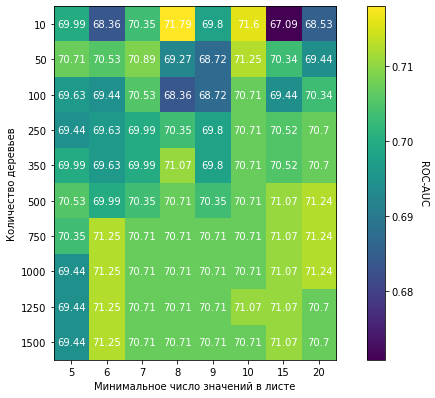

In [31]:
fig, ax = plt.subplots()
im = plt.imshow(roc_auc_array)
plt.yticks(ticks=range(len(n_estimators)), labels=n_estimators)
plt.xticks(ticks=range(len(min_samples_leaf)), labels=min_samples_leaf)
plt.xlabel('Минимальное число значений в листе')
plt.ylabel('Количество деревьев')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('ROC-AUC',rotation=-90, va="bottom")

for i in range(len(n_estimators)):
    for j in range(len(min_samples_leaf)):
        text = ax.text(j, i, round(roc_auc_array[i, j] * 100, 2), ha="center", va="center", color="w")

plt.show()

**Ответ:** получившаяся диаграмма зависимости показателя ROC-AUC от количества деревьев и минимального числа значений в листе в модели Random Forest Classifier указывает, что наибольшего значения данный показатель достигает при 10 деревьях и минимальном числе значений в листе, равном 8. При этом можно наблюдать устойчивые значения показателя ROC-AUC для моделей с количеством деревьев большим 500 и минимальным числом листов равным или большим 6.

### Задание 5 [1 балл]<a id="task3_5"></a>

Для лучшей модели случайного леса посчитайте важность признаков и постройте bar plot с помощью функции [`plt.bar`](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.bar.html). Какой признак оказался самым важным для определения диабета?

In [32]:
# your code here
best_rnd_clf = RandomForestClassifier(n_estimators=10, min_samples_leaf= 8, random_state=212)
best_rnd_clf.fit(X_train.values, y_train)
y_hat = best_rnd_clf.predict(X_test.values)
best_rnd_clf_roc_auc = roc_auc_score(y_true= y_test, y_score= y_hat)

bar_data = pd.DataFrame({
    'features': X_train.columns,
    'importance': best_rnd_clf.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index(drop=True)

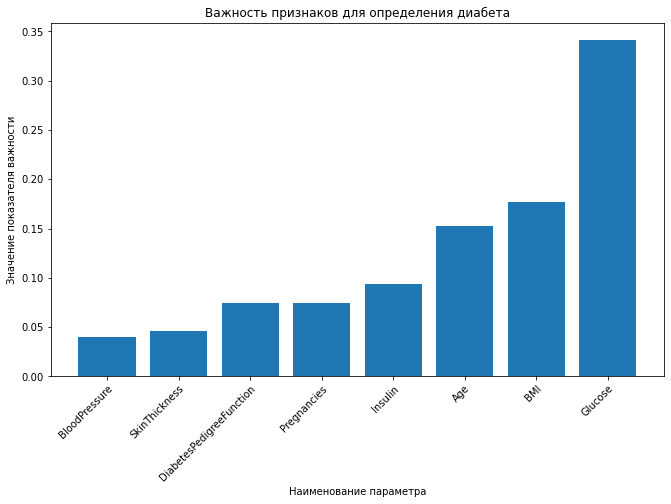

Наиболее важным признаком для определения диабета оказался Glucose.


In [33]:
fig, ax = plt.subplots()
plt.bar(bar_data.features, height=bar_data.importance, )
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel('Наименование параметра')
plt.ylabel('Значение показателя важности')
plt.title('Важность признаков для определения диабета')


plt.show()

print(f"Наиболее важным признаком для определения диабета оказался {bar_data.features[bar_data.importance.argmax()]}.")

### Задание 6 [1 балл]<a id="task3_6"></a>

По аналогии со случайным лесом, переберите различные значения числа деревьев для [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html) и постройте график зависимости AUC-ROC от числа деревьев. Что вы наблюдаете? Отличается ли этот график от аналогичного графика для случайного леса?

In [40]:
# your code here
n_estimators = [10, 50, 100, 250, 350, 500, 750, 1000, 1250, 1500]
min_samples_leaf = [5, 6, 7, 8, 9, 10, 15, 20]

GBC_roc_auc_array = np.zeros((len(n_estimators), len(min_samples_leaf)))

for i, est in enumerate(n_estimators):
    for j, leafs in enumerate(min_samples_leaf):
        GB_clf = GradientBoostingClassifier(n_estimators=est, 
                                            min_samples_leaf=leafs, 
                                            random_state=212)
        GB_clf.fit(X_train, y_train)
        y_hat = GB_clf.predict(X_test)
        GB_clf_roc_auc = roc_auc_score(y_true=y_test, y_score=y_hat)
        GBC_roc_auc_array[i,j] = GB_clf_roc_auc
        
GBC_roc_auc_array

array([[0.69964029, 0.70323741, 0.69236784, 0.70323741, 0.67062871,
        0.66703159, 0.69420551, 0.69780263],
       [0.71434157, 0.70714733, 0.70347201, 0.71074445, 0.71074445,
        0.69635596, 0.69819362, 0.71258211],
       [0.72880826, 0.7270488 , 0.71801689, 0.70714733, 0.7270488 ,
        0.7361589 , 0.71809509, 0.70898499],
       [0.70722552, 0.71985455, 0.7360807 , 0.72352987, 0.68548639,
        0.6945183 , 0.7036284 , 0.7035502 ],
       [0.71441977, 0.69635596, 0.72880826, 0.69635596, 0.69635596,
        0.69811542, 0.70003128, 0.68196747],
       [0.7035502 , 0.71441977, 0.7035502 , 0.69803722, 0.70171254,
        0.69268064, 0.69643416, 0.68196747],
       [0.67637629, 0.69268064, 0.66918205, 0.68181107, 0.69268064,
        0.68181107, 0.68020801, 0.67653269],
       [0.67101971, 0.69084298, 0.66918205, 0.68181107, 0.68181107,
        0.6619096 , 0.68196747, 0.6710979 ],
       [0.67461683, 0.68724586, 0.6619096 , 0.67453863, 0.67821395,
        0.6619096 , 0.672935

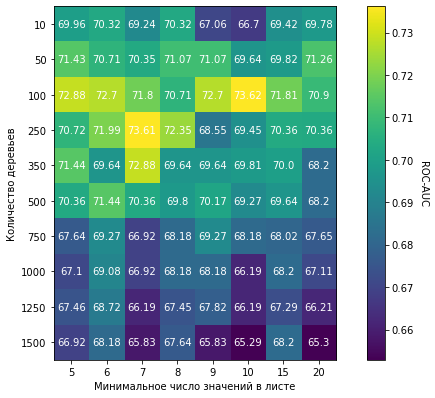

In [42]:
fig, ax = plt.subplots()
im = plt.imshow(GBC_roc_auc_array)
plt.yticks(ticks=range(len(n_estimators)), labels=n_estimators)
plt.xticks(ticks=range(len(min_samples_leaf)), labels=min_samples_leaf)
plt.xlabel('Минимальное число значений в листе')
plt.ylabel('Количество деревьев')
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('ROC-AUC',rotation=-90, va="bottom")

for i in range(len(n_estimators)):
    for j in range(len(min_samples_leaf)):
        text = ax.text(j, i, round(GBC_roc_auc_array[i, j] * 100, 2), ha="center", va="center", color="w")

plt.show()

**Ответ:** получившаяся диаграмма зависимости показателя ROC-AUC от количества деревьев и минимального числа значений в листе в модели Gradient Boosting Classifier указывает, что наибольшего значения данный показатель достигает при 100 деревьях и минимальном числе значений в листе, равном 10. Данная диаграмма сильно отличается от той, что была сформирована для модели Random Forest Classifier. Можно наблюдать, что при росте числа деревьев, показатель ROC-AUC для модели Gradient Boosting Classifier увеличивается в начале, а затем резко падает в отличие от изменения ROC-AUC для модели Random Forest Classifier, который скорее выходит на плато при большем количестве деревьев.